In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [169]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.97,167,72,-118.1,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.04,-157,0,-118.4,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.91,-101,135,-118.4,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.87,138,175,-118.1,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.04,0,0,-118.3,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [170]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,3.07e+04,3.07e+04,3.07e+04,3.07e+04,3.07e+04,3.07e+04,3.07e+04,3.07e+04,3.07e+04,3.07e+04,3.07e+04,2.57e+04,3.07e+04,3.07e+04
mean,249.2,2.476e+07,33.95,7.11,91.11,-118.3,4.886,2.519,0.1466,28.37,13.44,0.4462,1.611e+09,1.535e+04
std,150.0,7.755e+06,0.08779,110.1,87.79,0.1101,3.45,1.154,0.3537,17.48,9.374,0.4971,0.0,8.862e+03
min,2.0,2e+07,33.25,-250.0,-44.0,-118.5,0.0,1.0,0.0,0.0,0.0,0.0,1.611e+09,1.0
25%,110.0,2.05e+07,33.88,-68.0,4.0,-118.3,2.0,1.0,0.0,13.0,5.0,0.0,1.611e+09,7.675e+03
50%,253.0,2.09e+07,33.97,0.0,74.0,-118.3,5.0,3.0,0.0,28.0,15.0,0.0,1.611e+09,1.535e+04
75%,368.0,2.96e+07,34.04,95.0,160.0,-118.2,8.0,3.0,0.0,43.0,21.0,1.0,1.611e+09,2.302e+04
max,659.0,4.99e+07,34.09,248.0,791.0,-118.0,11.0,7.0,1.0,59.0,79.0,1.0,1.611e+09,3.07e+04


In [123]:
df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.97,167,72,-118.1,10,1,...,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,away,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.04,-157,0,-118.4,10,1,...,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,away,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.91,-101,135,-118.4,7,1,...,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,away,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.87,138,175,-118.1,6,1,...,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,away,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.04,0,0,-118.3,6,2,...,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,away,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,34.0,1,48,-118.3,6,4,...,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,home,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.04,0,0,-118.3,6,4,...,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-06-19,home,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.88,-134,166,-118.4,3,4,...,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,home,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.78,31,267,-118.2,2,4,...,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,home,IND,30696


# Some preprocessing and data exploration

In [144]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'period', 'playoffs', 'season',
       'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'game_date', 'matchup',
       'opponent', 'shot_id', 'time_remaining'],
      dtype='object')

#### Season
In season column we can extract the number of season as the year is already in date

In [171]:
df['season'] = df['season'].apply(lambda x: x.split('-')[-1])

#### Change the matchup column.
when they play away court, there is an @. Change it to away/home

In [172]:
df['matchup'] = df['matchup'].apply(lambda x: str('away') if '@' in x else str('home'))

#### There are some columns that have very high corelations with some other columns and some columns that
(Ismail) Removing columns
team_name, team_id - These have only a single value, so it doesn’t add any value to the prediction

In [173]:
df = df.drop(labels=['team_name', 'team_id'], axis='columns')

In [174]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.97,167,72,-118.1,10,1,...,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,away,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.04,-157,0,-118.4,10,1,...,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,away,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.91,-101,135,-118.4,7,1,...,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,away,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.87,138,175,-118.1,6,1,...,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,away,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.04,0,0,-118.3,6,2,...,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,away,POR,5


In [175]:
print(df.minutes_remaining.max())
print(df.seconds_remaining.max())

11
59


From the maximum values of seconds and minutes we observe that it shows at what moment the shot was taken. Unfortunatelly we don't have information in which quarter the shot is taken.
Games in the NBA have a 12 quareter length. We can merge these two columns as time_remaining.
We will transfer the minutes left in seconds

**It will be useful to see the shots taken in the last seconds of the quareter in order to see how 'clutch' Kobe was**
Unfortunately we don't have data for the 24 second shot-clock.

In [176]:
df['time_remaining'] = df['minutes_remaining']*60 + df['seconds_remaining']
df.drop(['minutes_remaining', 'seconds_remaining'], axis=1, inplace=True)

#### Shot location
These columns mainly give us information of the location of the shot.
Notice that there is only a 3PT and 2PT shot type. There is no Free Throw.

Every player has its sweet spot where he shoots better. Some players are better three point shooters, some shoot better from mid-range, some from the corner. It will be important to analyze the efficiency on every location

In [177]:
df[['shot_type', 'shot_zone_area','shot_zone_basic', 'shot_zone_range']]

,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range
0,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.
1,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.
2,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.
3,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.
4,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.
...,...,...,...,...
30692,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.
30693,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.
30694,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.
30695,3PT Field Goal,Center(C),Above the Break 3,24+ ft.


In [178]:
df.shot_type.value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [179]:
df.combined_shot_type.value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

### Analyzing the shots:
We see that there is a very high shot efficiency when the player is dunking the ball in any type of action
#### TODO: better visualize this

Action type is the type of shot that led to shoot. We see that we mostly have Jump Shots and Layups

In [180]:
# pd.set_option('display.float_format', '{:.4}'.format) # turned on so that we have percentage
df.groupby(['combined_shot_type', 'action_type'])['shot_made_flag'].value_counts(normalize=True)

combined_shot_type  action_type                  shot_made_flag
Bank Shot           Driving Bank shot            1.0              0.6667
                                                 0.0              0.3333
                    Hook Bank Shot               1.0                 1.0
                    Pullup Bank shot             1.0              0.5455
                                                 0.0              0.4545
                                                                   ...  
Layup               Tip Layup Shot               1.0                 0.5
                    Turnaround Finger Roll Shot  1.0                 1.0
Tip Shot            Running Tip Shot             0.0                 1.0
                    Tip Shot                     0.0               0.649
                                                 1.0               0.351
Name: shot_made_flag, Length: 104, dtype: float64

# Questions we want to answer
How does the shooting efficiency change:
- during every season.
- by time left
- by distance
- by minutes remaining in each quarter.
- versus playing with different teams
- in the playofs

## Shooting by season

<AxesSubplot:xlabel='season', ylabel='shot_made_flag'>

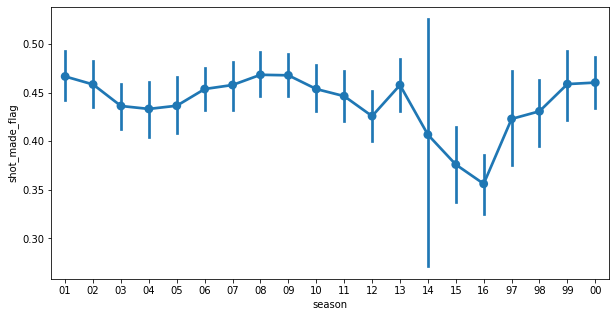

In [190]:
plt.figure(figsize=(10, 5))
# TODO: order by year
sns.pointplot(x='season', y='shot_made_flag',data=df)

## Shooting playoff vs regular season

<AxesSubplot:xlabel='season', ylabel='shot_made_flag'>

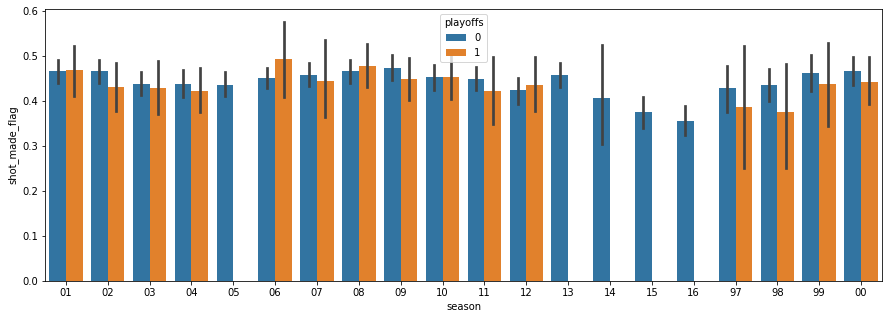

In [195]:
plt.figure(figsize=(15, 5))
sns.barplot(x='season', y='shot_made_flag', hue='playoffs',data=df)

## Shot efficiency by time left

<AxesSubplot:xlabel='time_remaining', ylabel='shot_made_flag'>

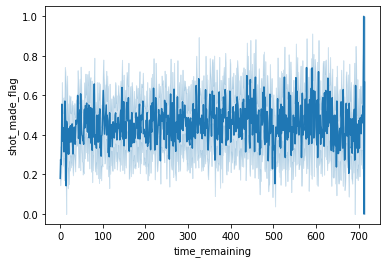

In [198]:
sns.lineplot(x='time_remaining', y='shot_made_flag', data=df)

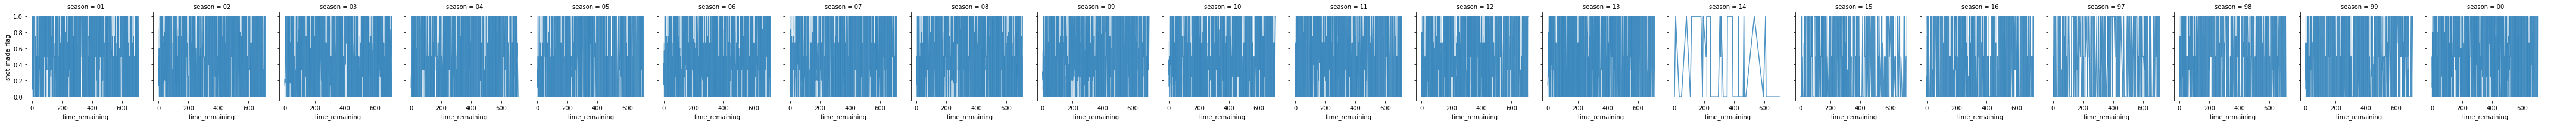

In [200]:
sea = sns.FacetGrid(df, col = "season")

# map the above form facetgrid with some attributes
sea.map(sns.lineplot, "time_remaining", "shot_made_flag", alpha = .8)

# adding legend
sea.add_legend()